In [21]:
# the key idea is that instead of doing L2 training we do sobolev training ! 

# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.17.2
#   kernelspec:
#     display_name: .venv
#     language: python
#     name: python3
# ---

In [22]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
d_p = 20
d_V = 20
epochs = 10

In [24]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
])

coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:32:47,757 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [25]:


# now we need to do sobolev training with custom function knowing the PDE

In [26]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"
coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)

In [27]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:32:47,809 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [28]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.2)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [29]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]

2025-08-05 20:32:53,987 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:32:53,988 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.045411
2025-08-05 20:32:53,989 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.042047
Training progress:  10%|█         | 1/10 [00:05<00:50,  5.58s/it]2025-08-05 20:32:58,337 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:32:58,338 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.037499
2025-08-05 20:32:58,338 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.039202
Training progress:  20%|██        | 2/10 [00:09<00:38,  4.86s/it]2025-08-05 20:33:02,650 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:33:02,652 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.032118
2025-08-05 20:33:02,654 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.029621
Training progress:  30%|███       | 3/10 [00:14<00:32,  4.61s/it]2025-08-05 20:33:07,103 - sciml.model.deeponet.deeponet

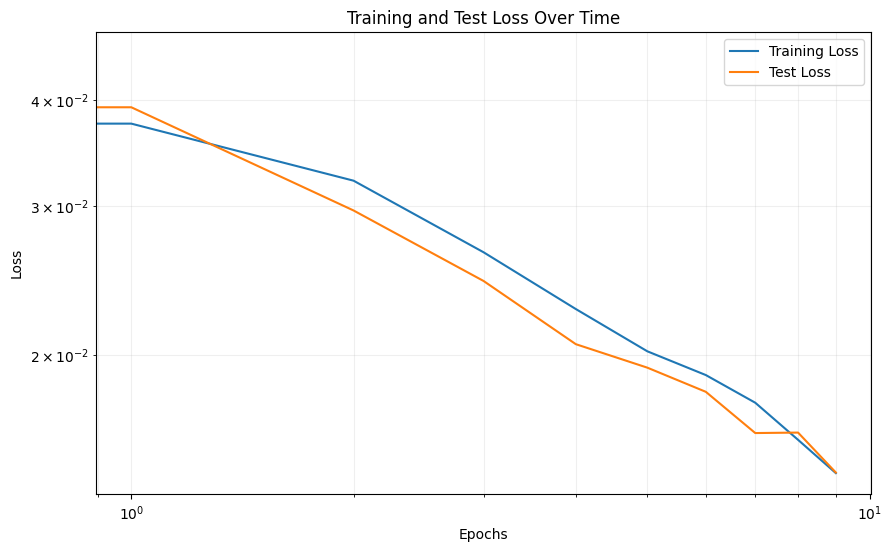

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


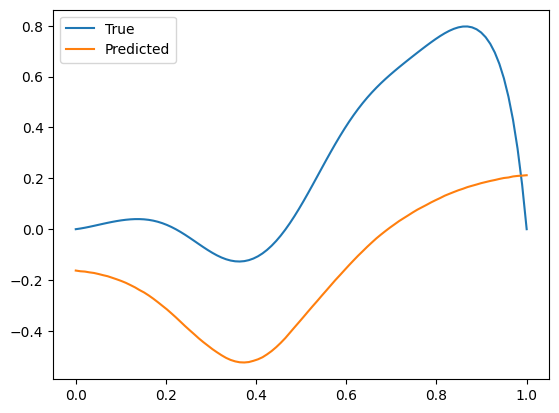

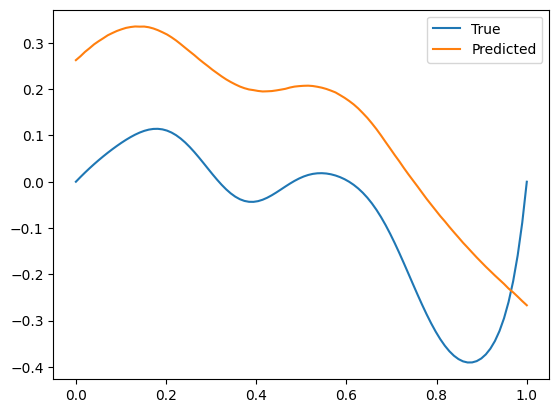

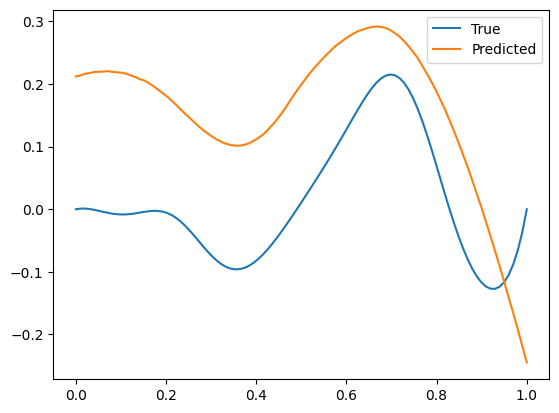

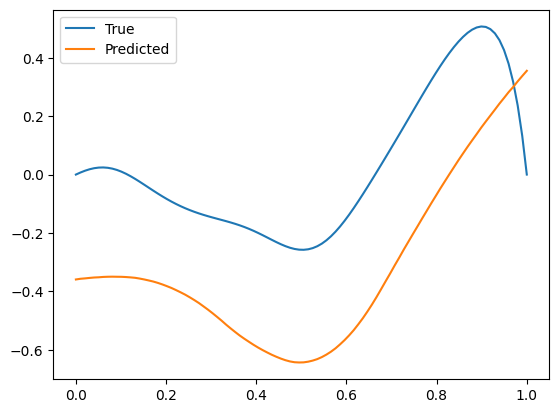

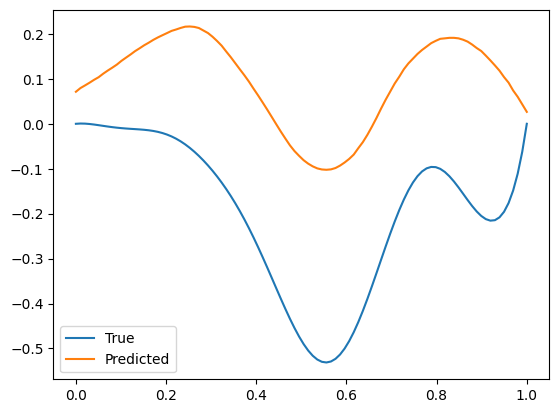

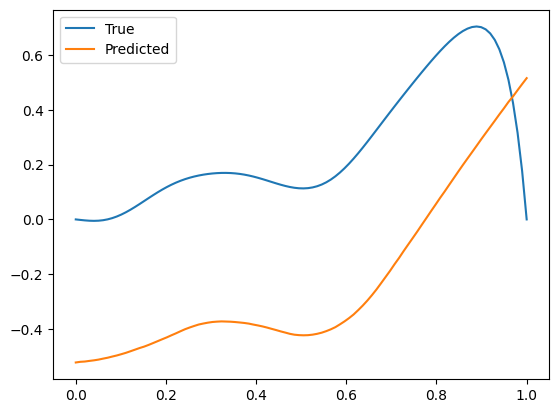

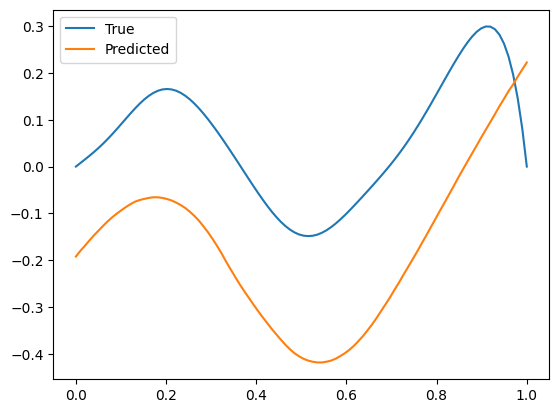

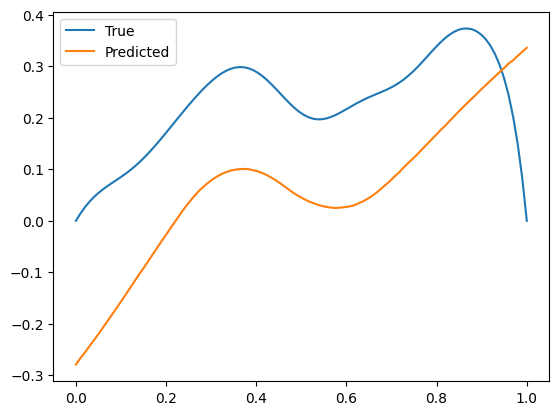

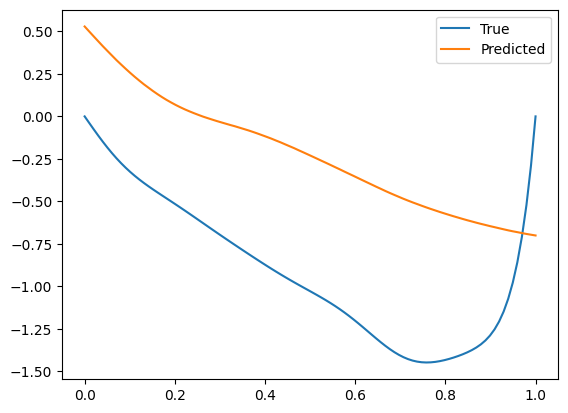

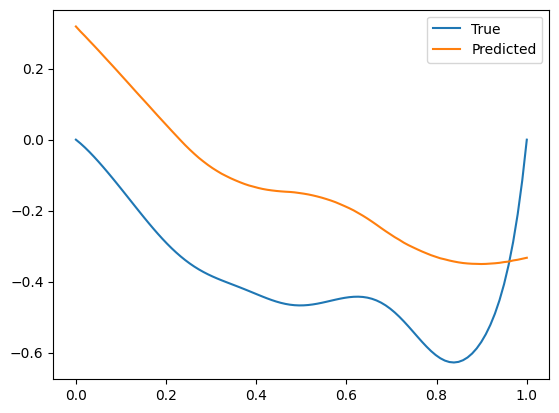

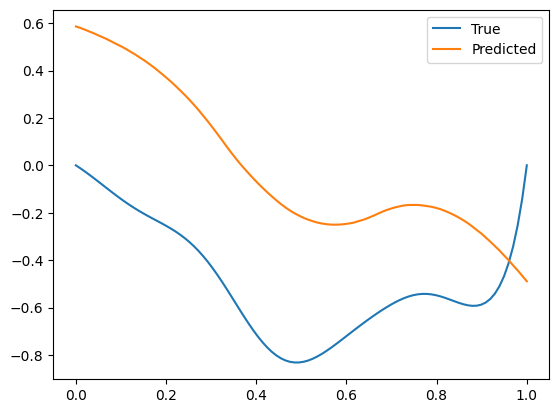

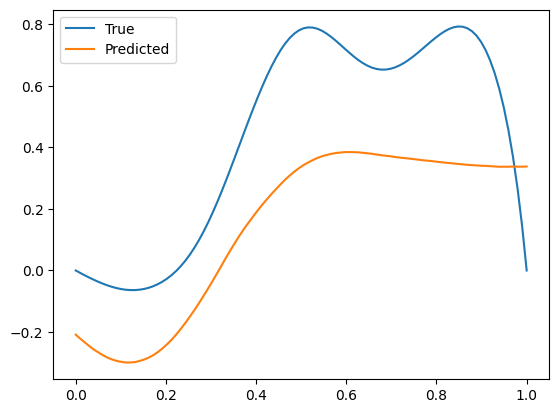

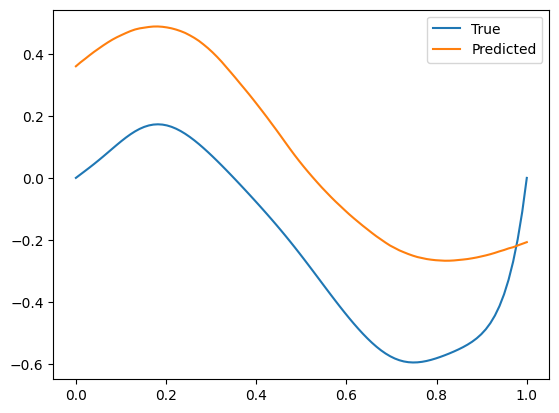

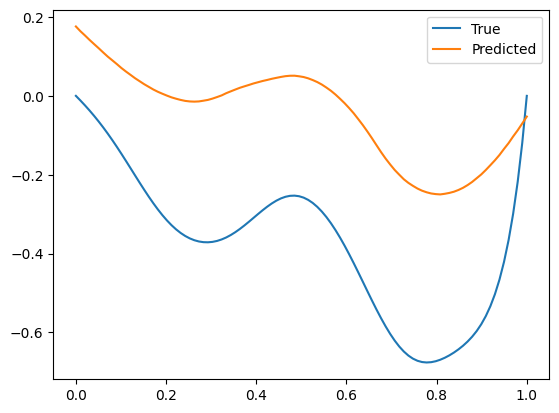

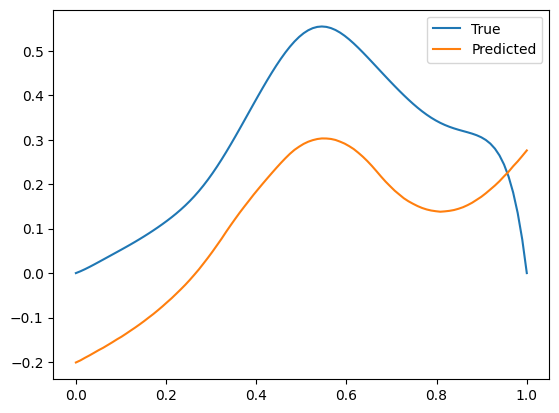

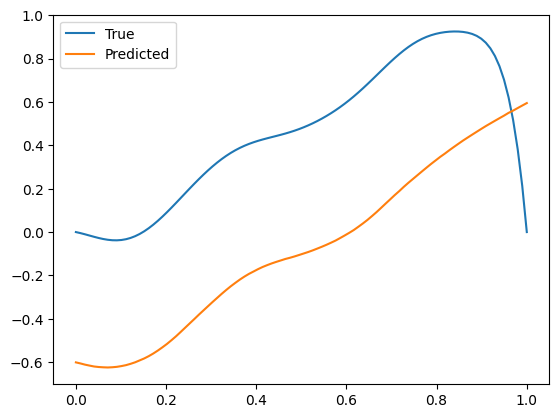

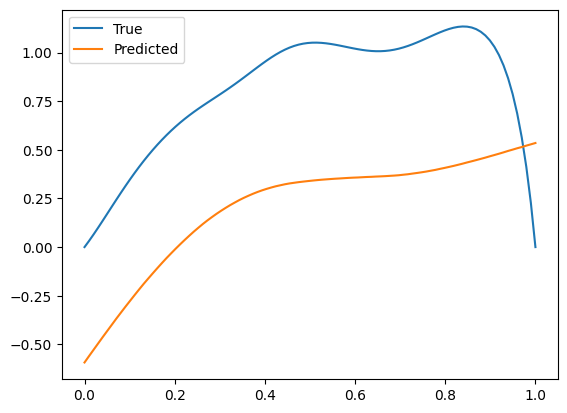

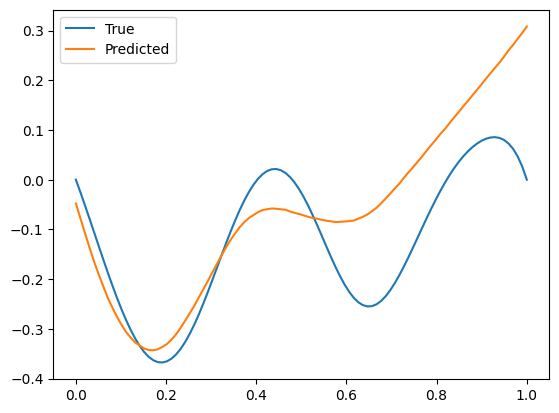

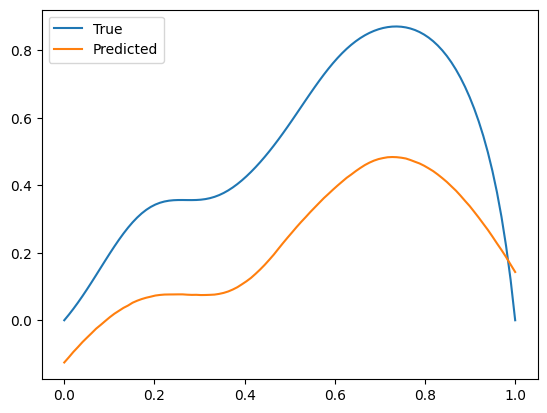

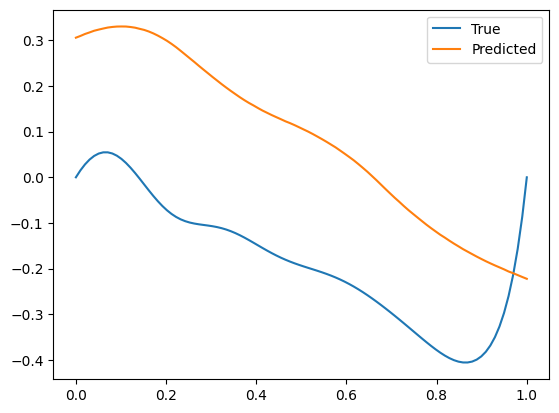

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:33:46,581 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:33:46,583 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.013634
2025-08-05 20:33:46,584 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.013403
Training progress:  10%|█         | 1/10 [00:05<00:47,  5.28s/it]2025-08-05 20:33:51,545 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:33:51,546 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012787
2025-08-05 20:33:51,547 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.012795
Training progress:  20%|██        | 2/10 [00:10<00:40,  5.09s/it]2025-08-05 20:33:56,071 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:33:56,072 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.011976
2025-08-05 20:33:56,073 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.011958
Training progress:  30%|███       | 3/10 [00:14<00:33,  4.83s/i

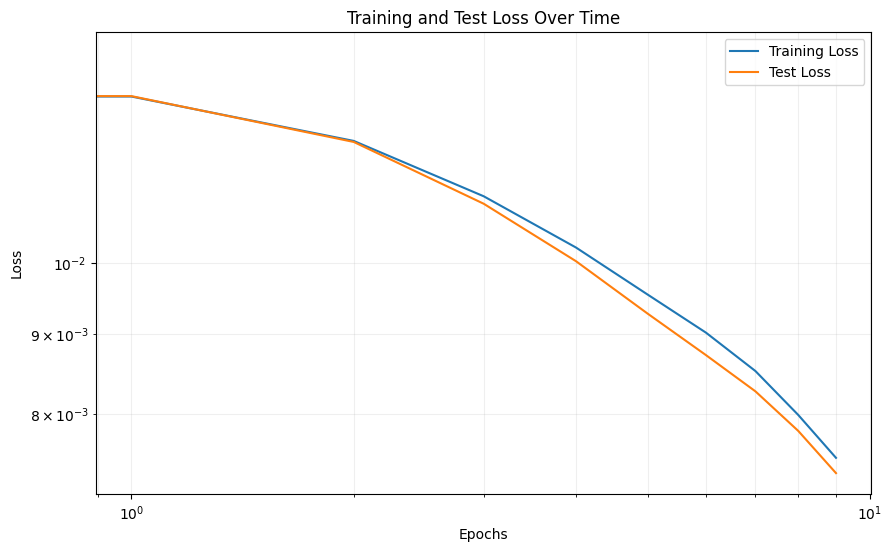

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


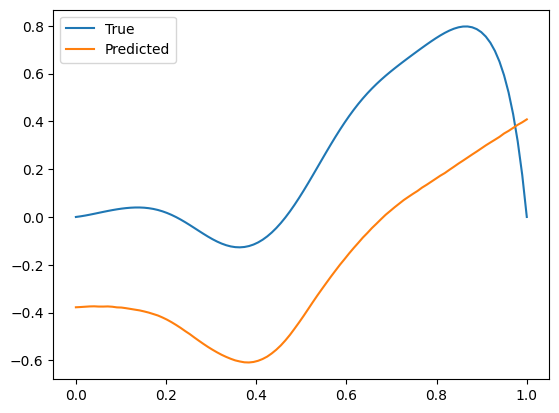

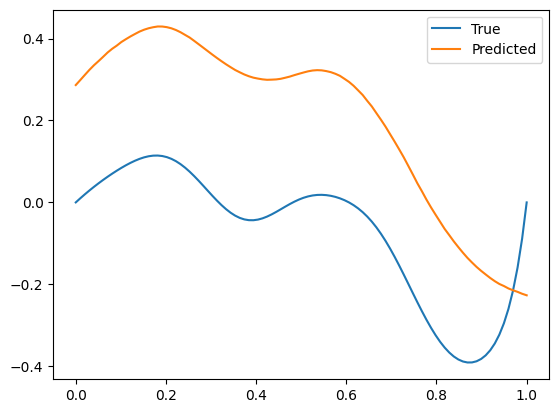

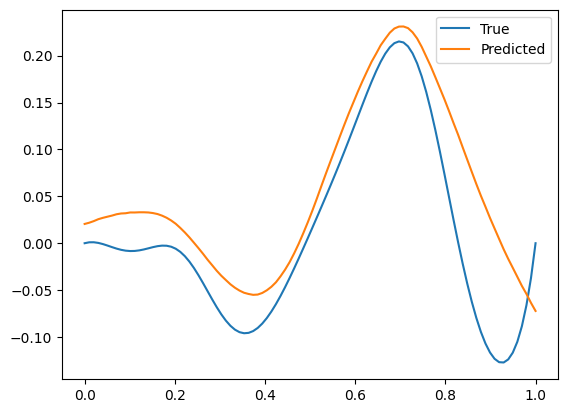

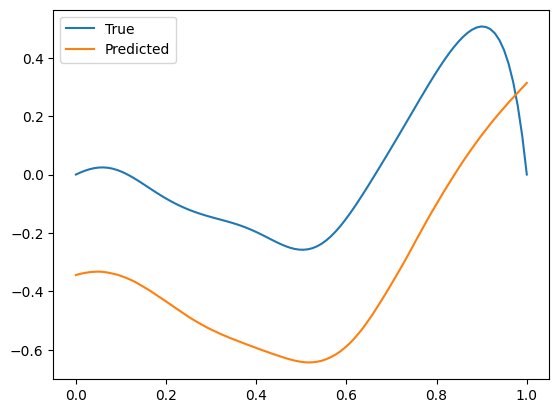

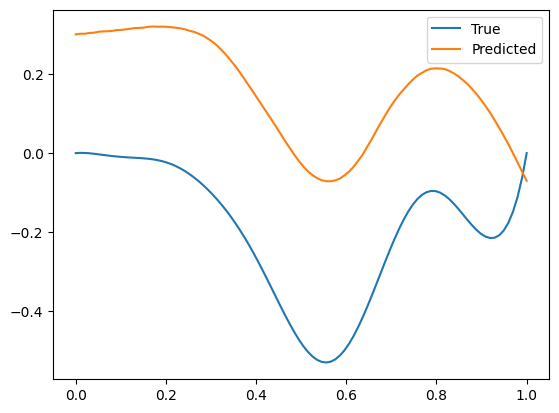

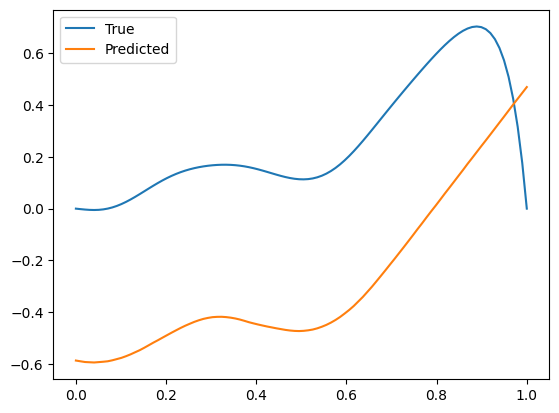

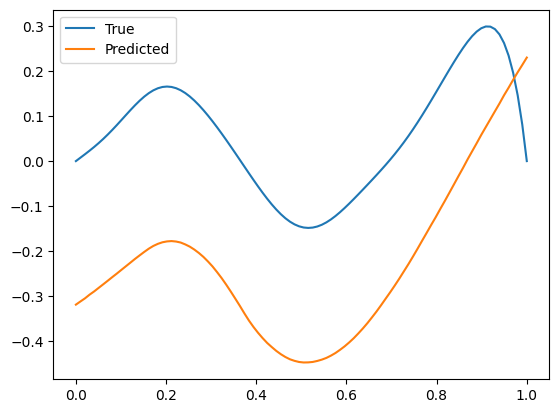

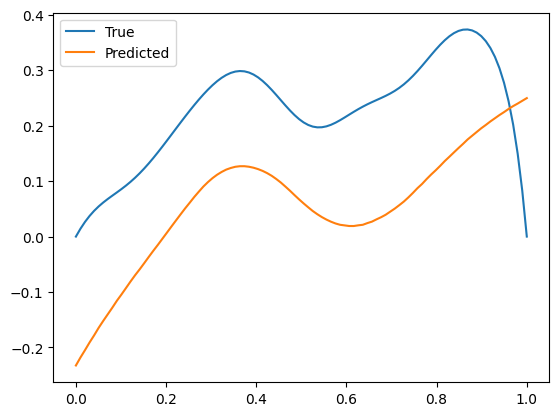

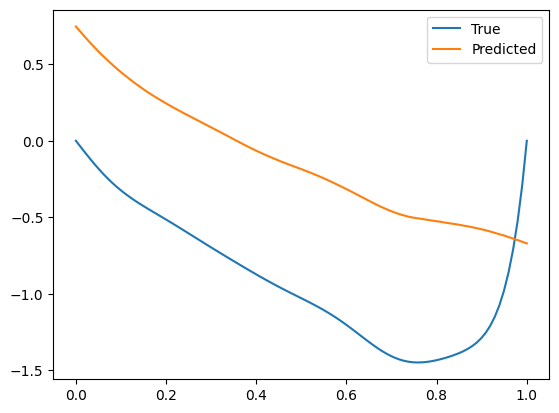

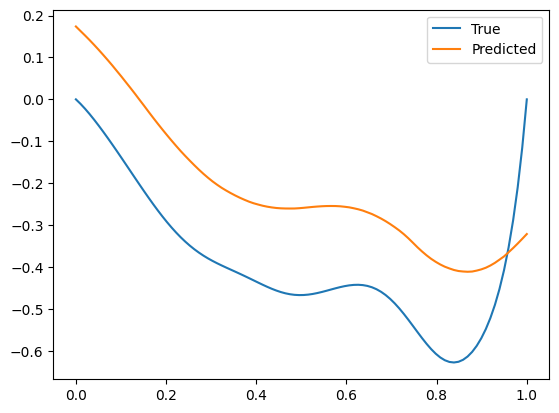

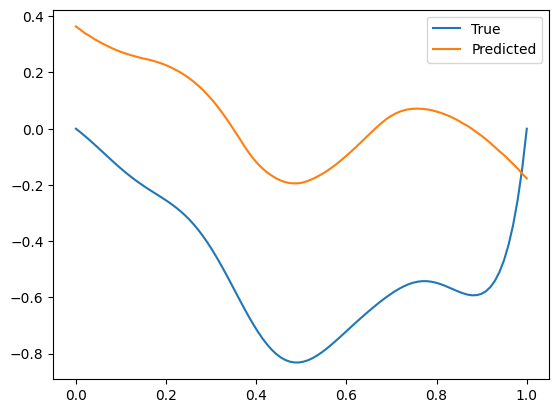

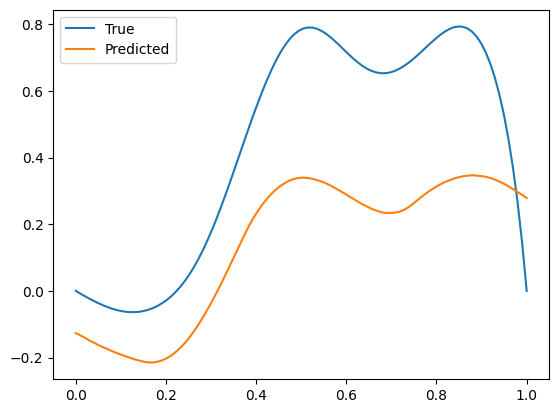

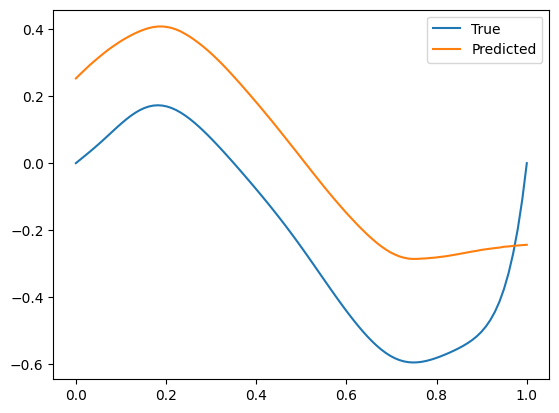

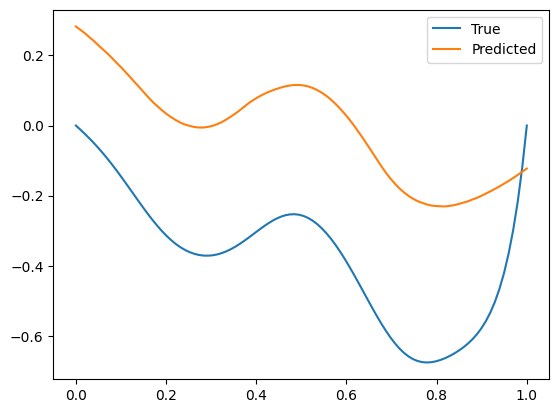

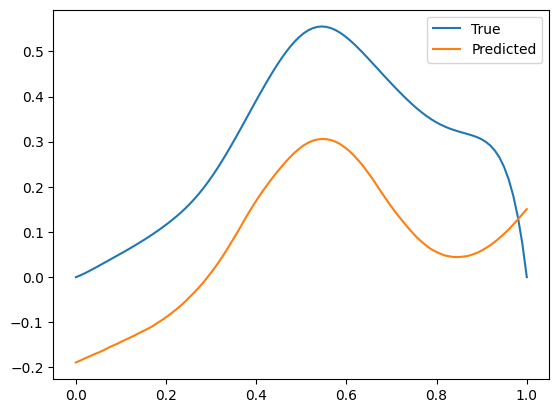

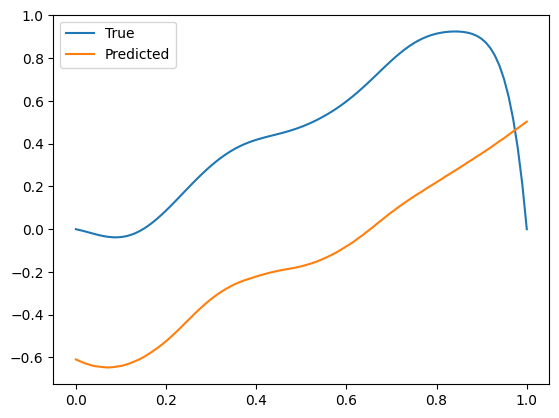

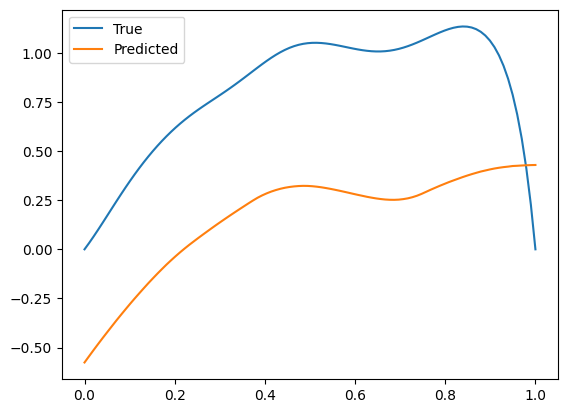

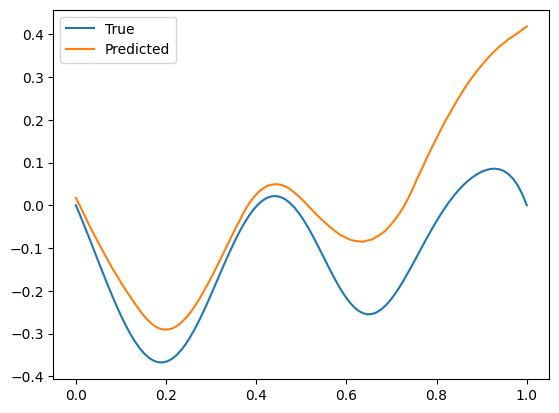

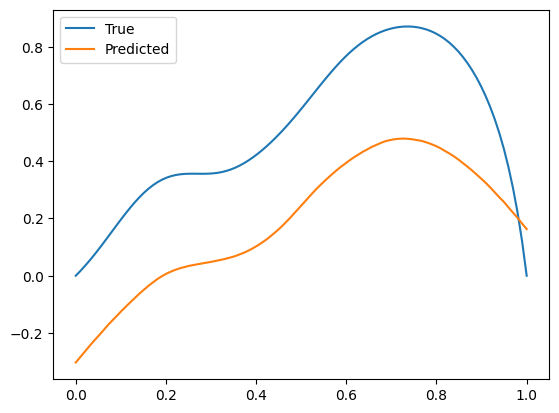

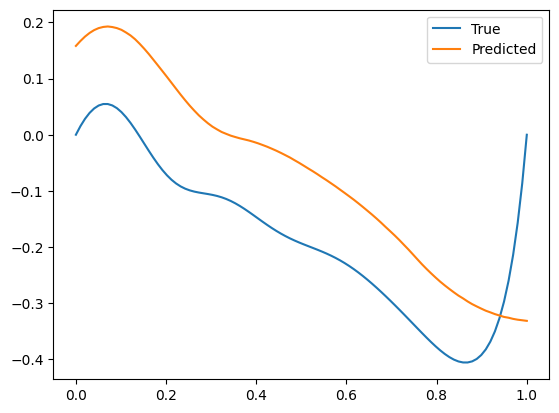

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:34:40,814 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:34:40,815 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.007050
2025-08-05 20:34:40,817 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.006946
Training progress:  10%|█         | 1/10 [00:04<00:43,  4.79s/it]2025-08-05 20:34:45,576 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:34:45,579 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.006660
2025-08-05 20:34:45,579 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.006547
Training progress:  20%|██        | 2/10 [00:09<00:38,  4.77s/it]2025-08-05 20:34:50,466 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:34:50,466 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.006317
2025-08-05 20:34:50,467 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.006301
Training progress:  30%|███       | 3/10 [00:14<00:33,  4.83s/i

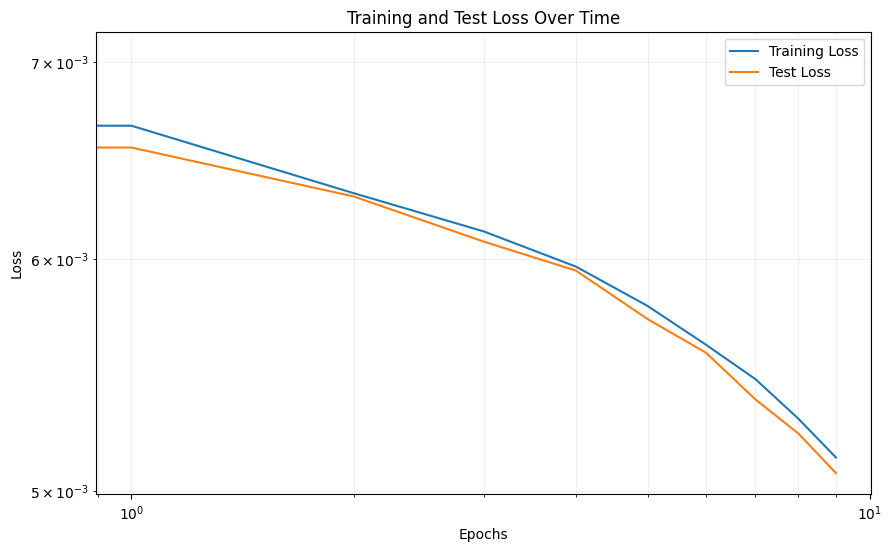

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


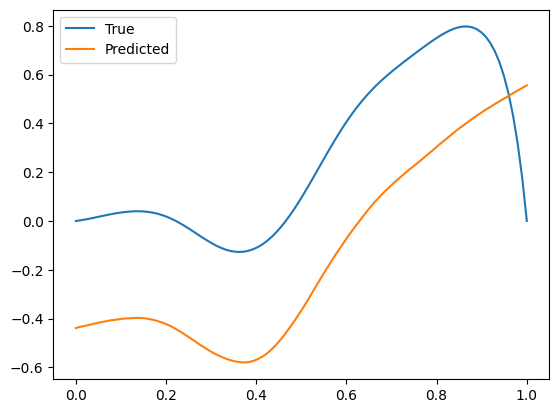

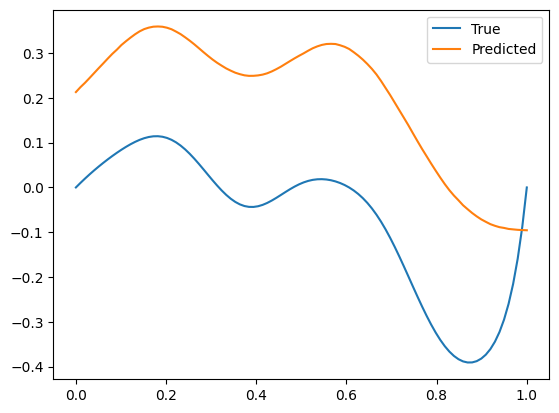

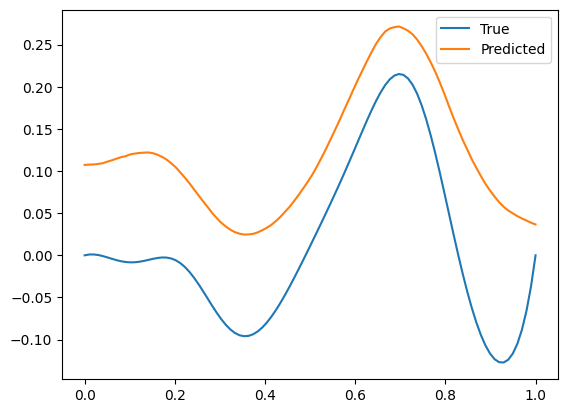

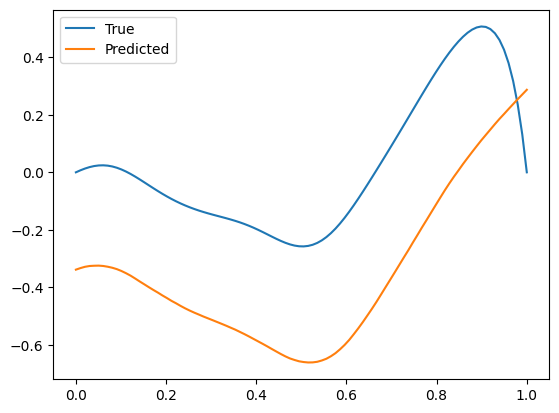

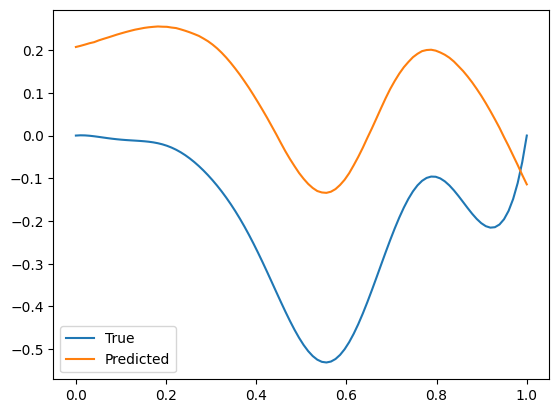

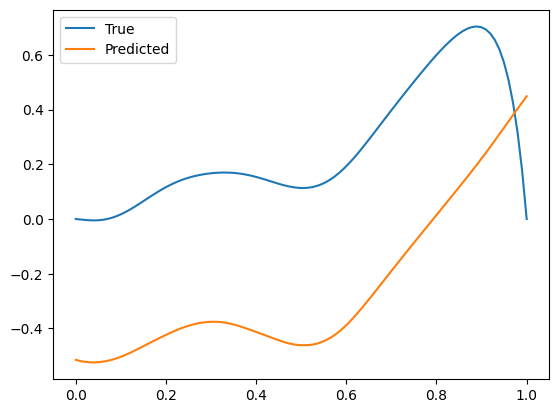

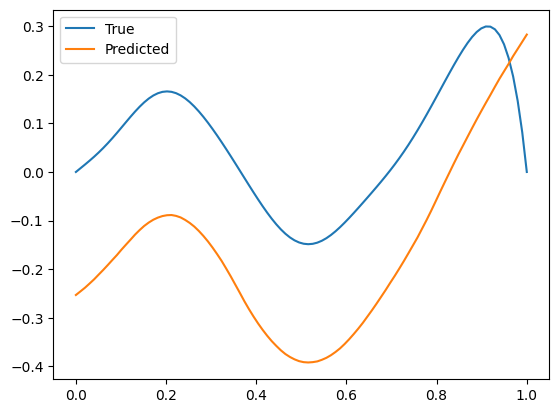

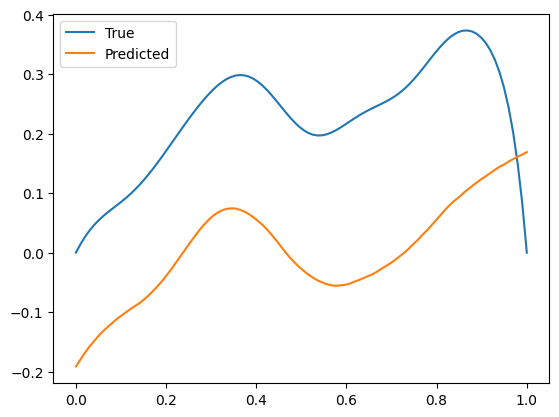

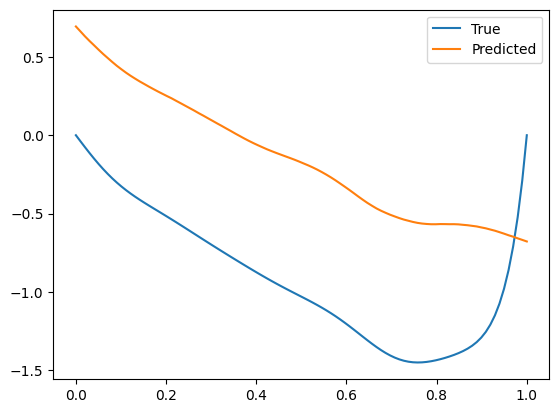

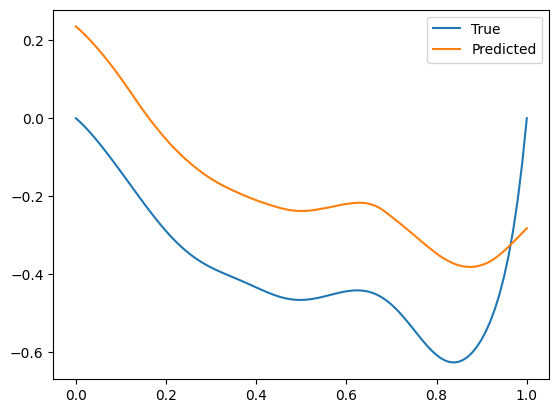

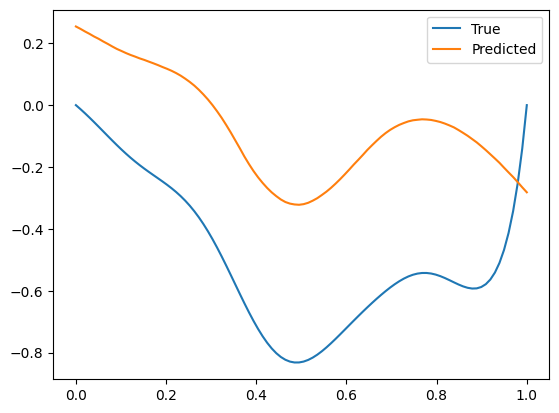

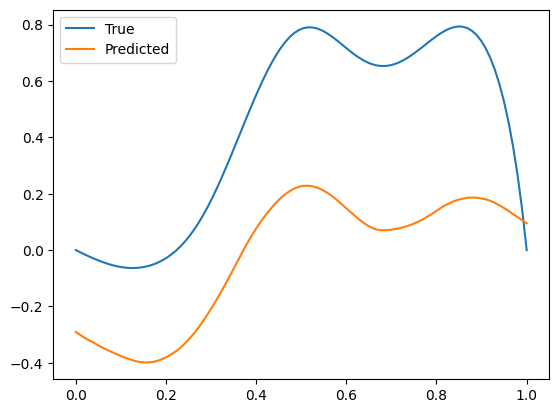

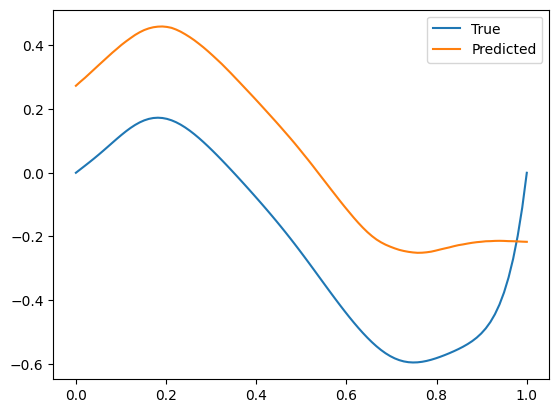

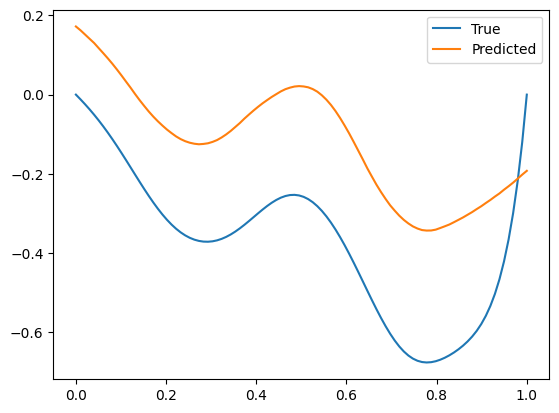

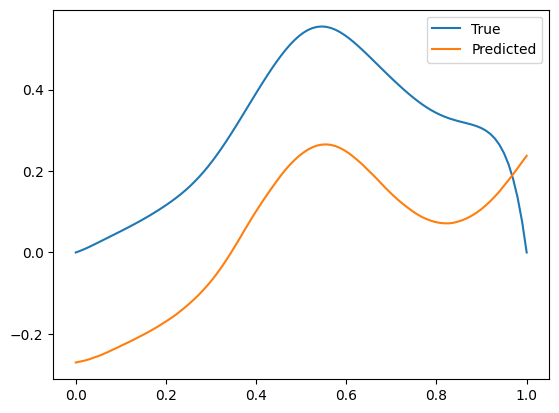

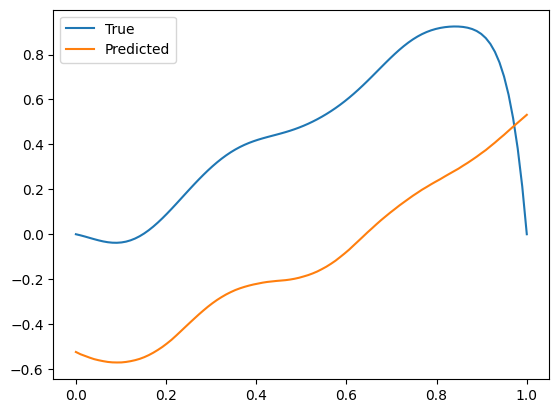

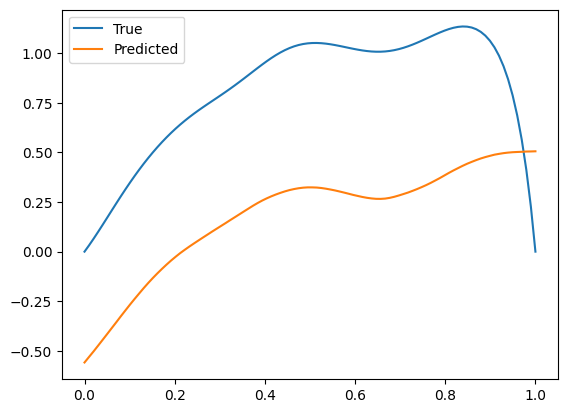

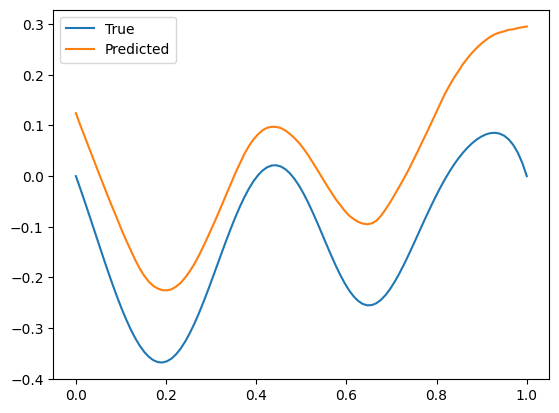

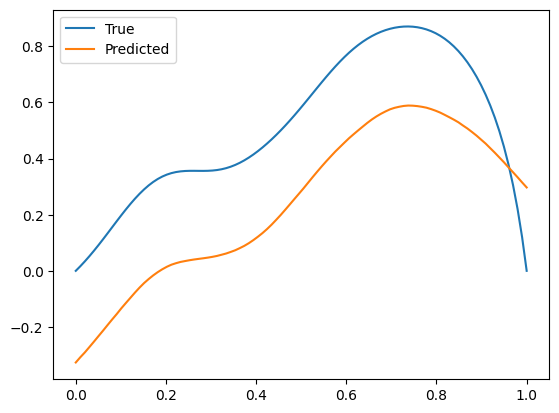

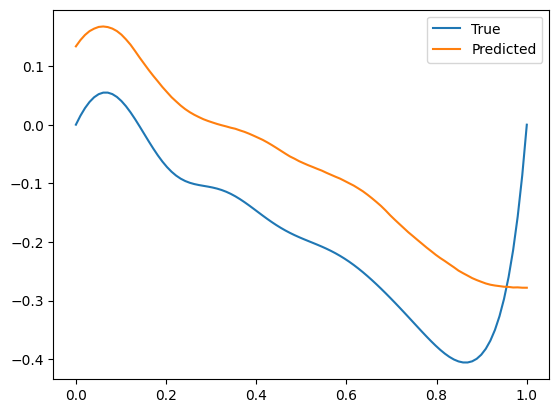

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:35:34,477 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:35:34,479 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.004906
2025-08-05 20:35:34,480 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.004882
Training progress:  10%|█         | 1/10 [00:04<00:43,  4.83s/it]2025-08-05 20:35:39,683 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:35:39,685 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.004747
2025-08-05 20:35:39,686 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.004771
Training progress:  20%|██        | 2/10 [00:10<00:40,  5.05s/it]2025-08-05 20:35:46,063 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:35:46,064 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.004670
2025-08-05 20:35:46,065 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.004708
Training progress:  30%|███       | 3/10 [00:16<00:39,  5.66s/i

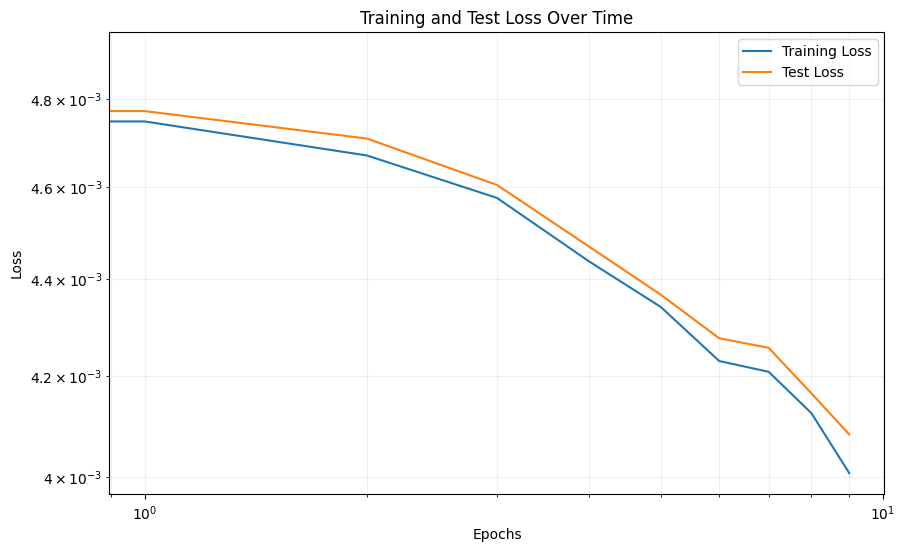

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


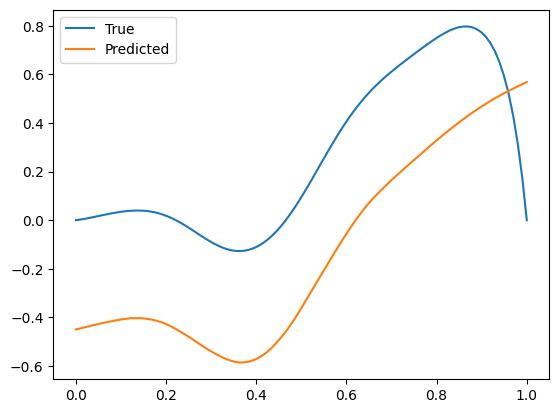

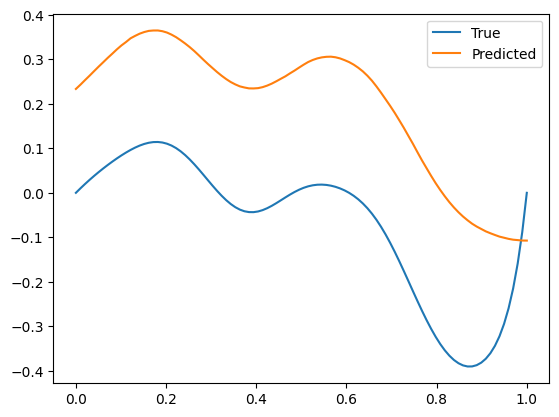

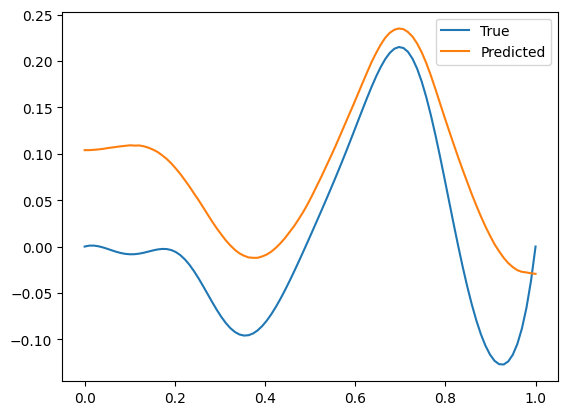

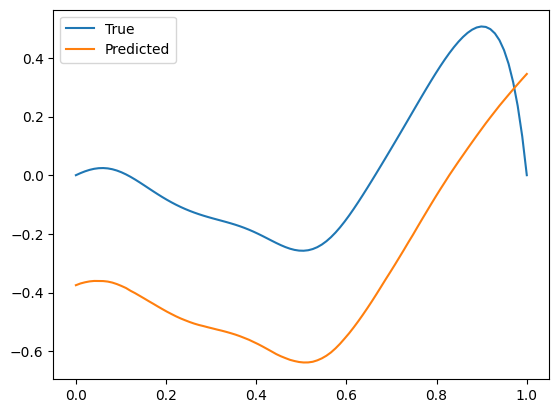

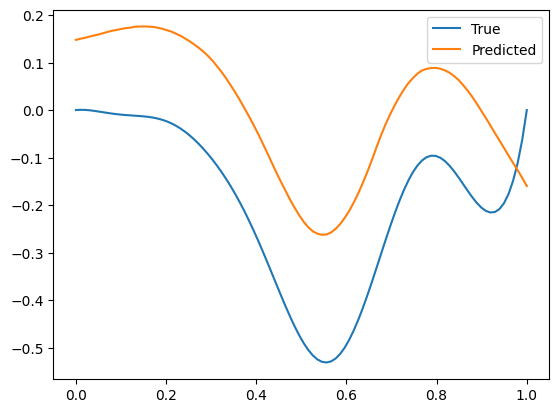

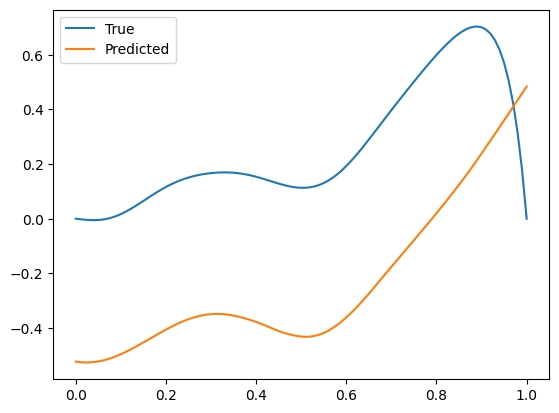

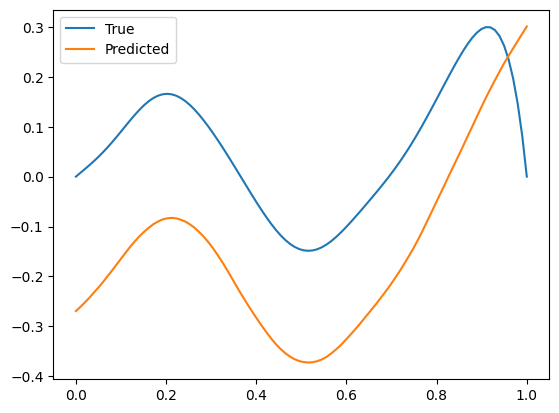

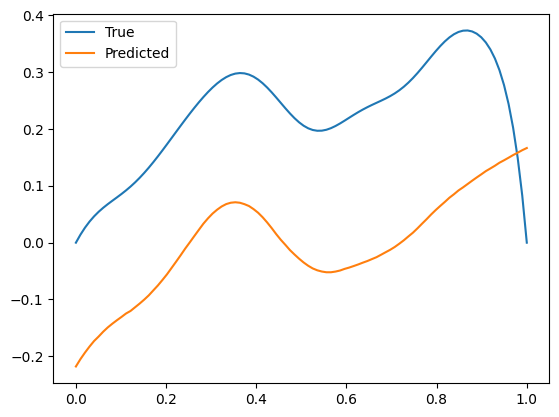

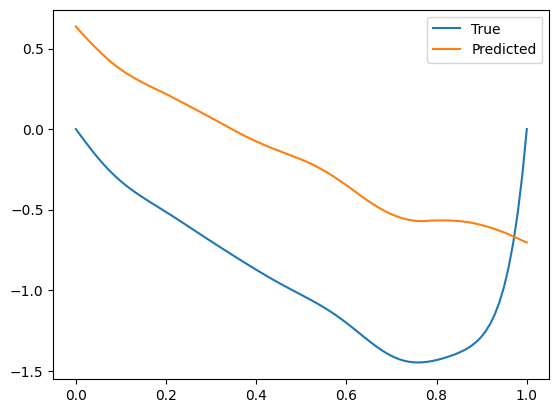

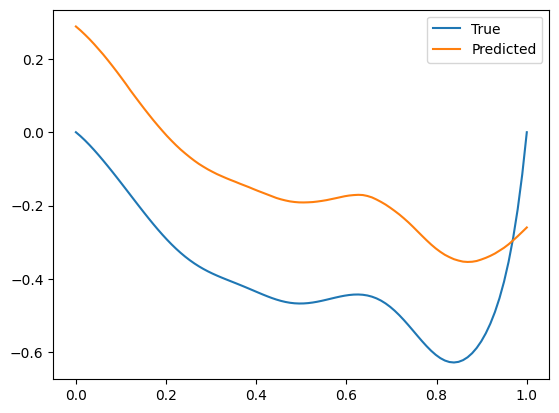

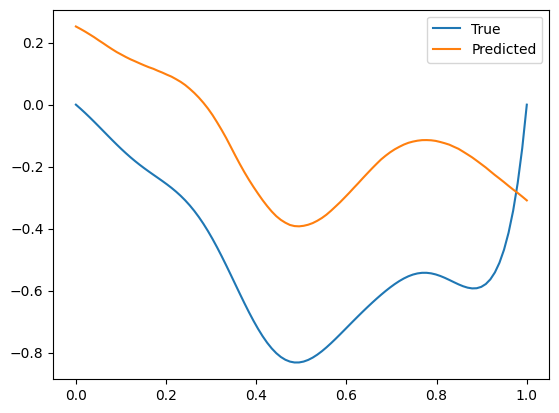

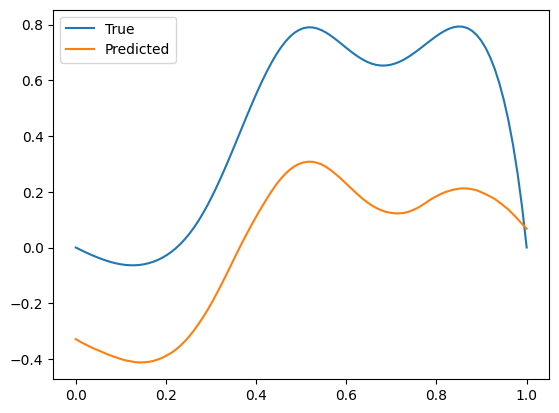

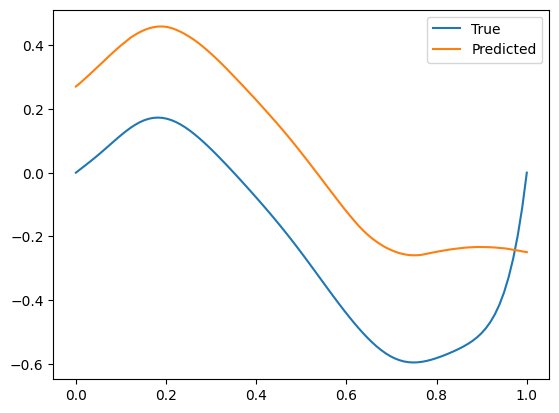

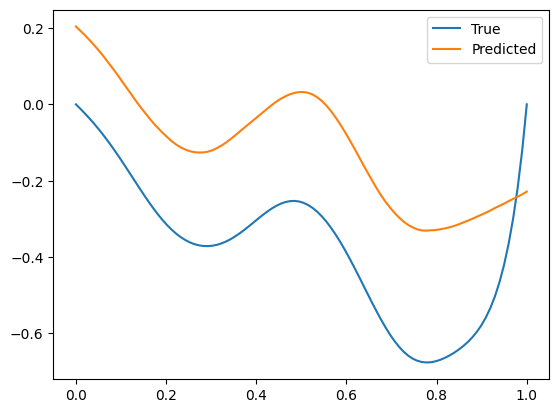

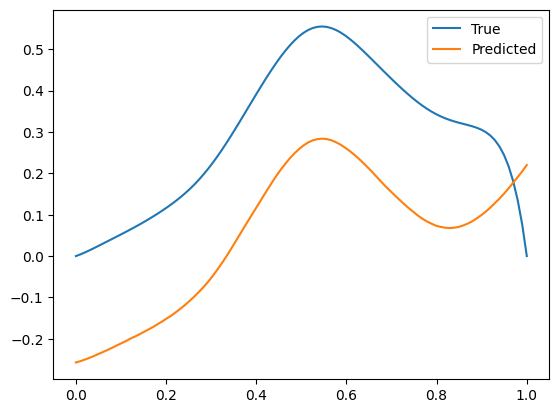

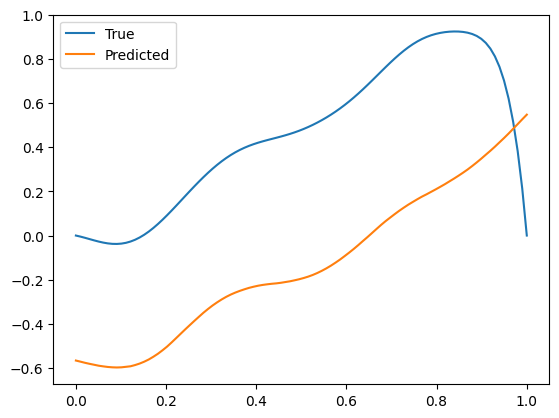

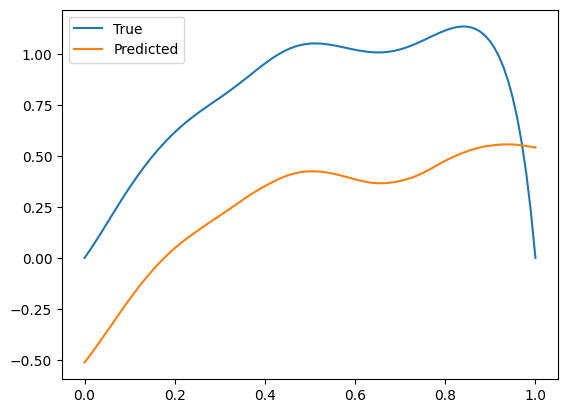

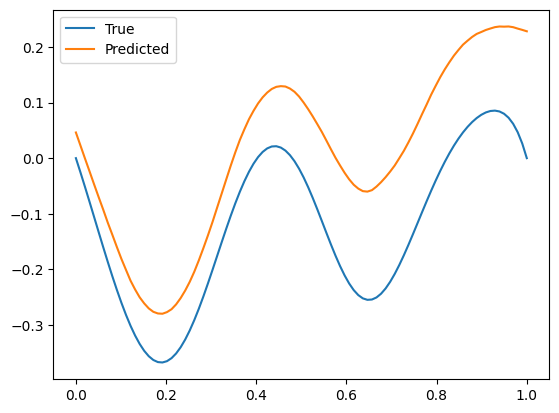

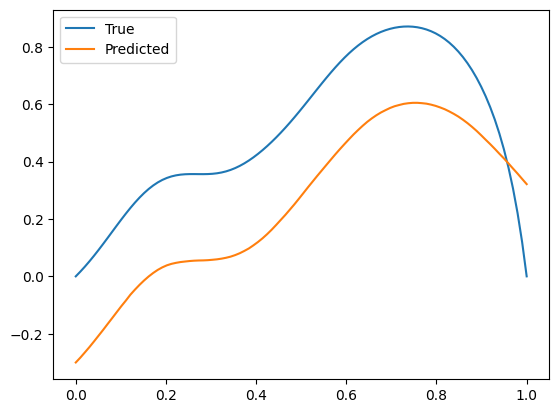

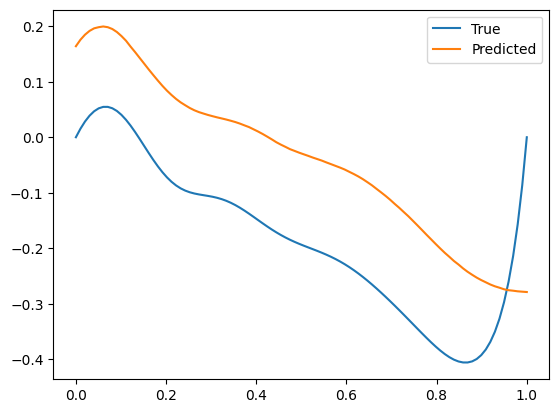

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:36:34,555 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:36:34,556 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.003947
2025-08-05 20:36:34,556 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.004017
Training progress:  10%|█         | 1/10 [00:05<00:45,  5.03s/it]2025-08-05 20:36:39,669 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:36:39,671 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.003888
2025-08-05 20:36:39,672 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.003983
Training progress:  20%|██        | 2/10 [00:10<00:40,  5.08s/it]2025-08-05 20:36:44,960 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-05 20:36:44,961 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.003787
2025-08-05 20:36:44,962 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.003895
Training progress:  30%|███       | 3/10 [00:15<00:36,  5.18s/i

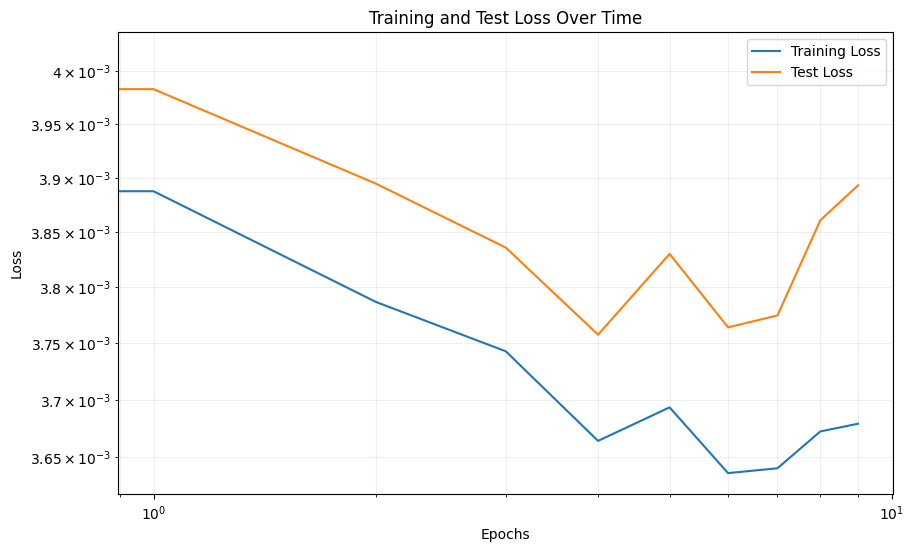

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


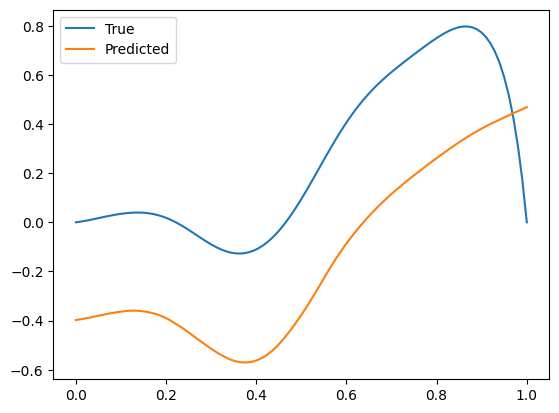

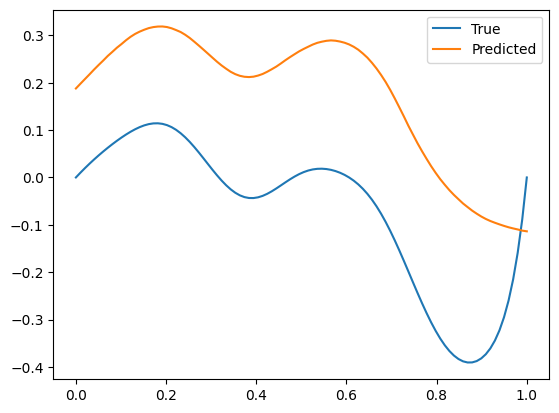

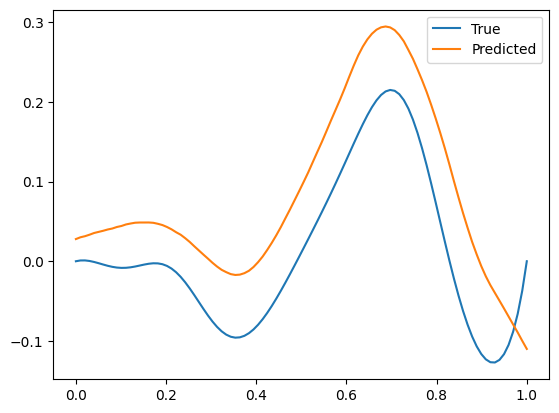

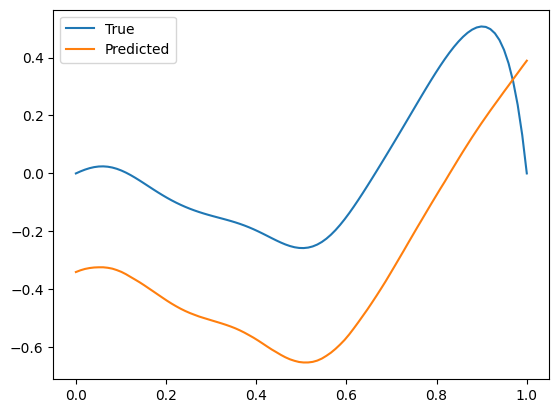

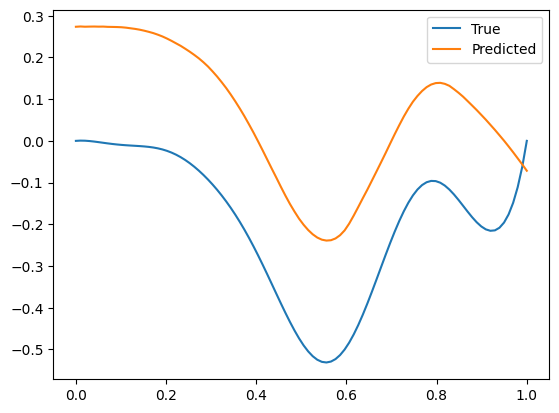

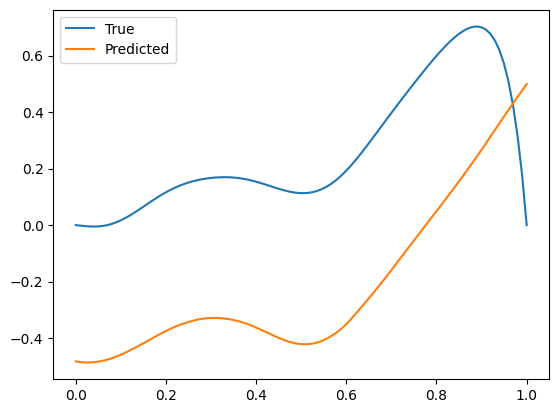

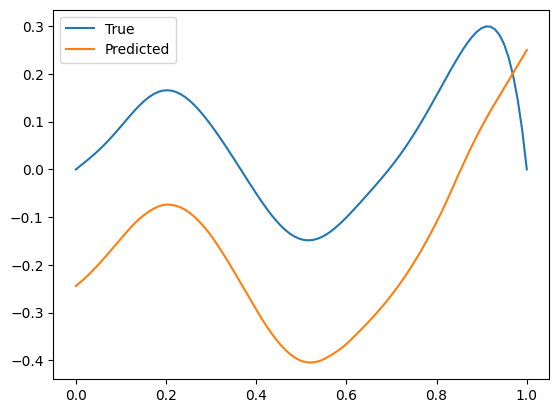

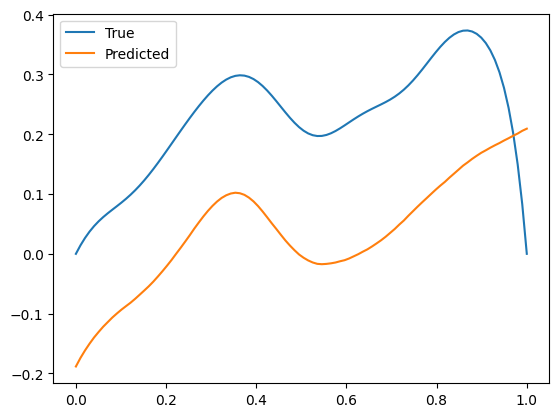

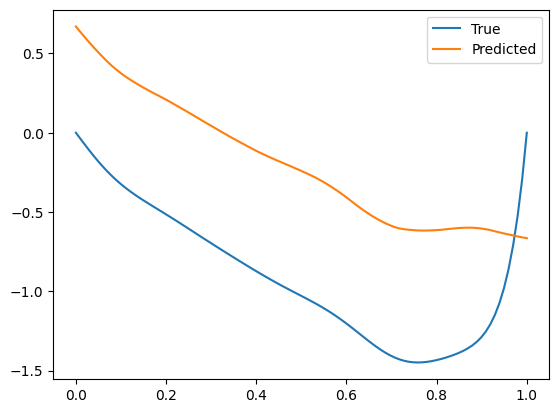

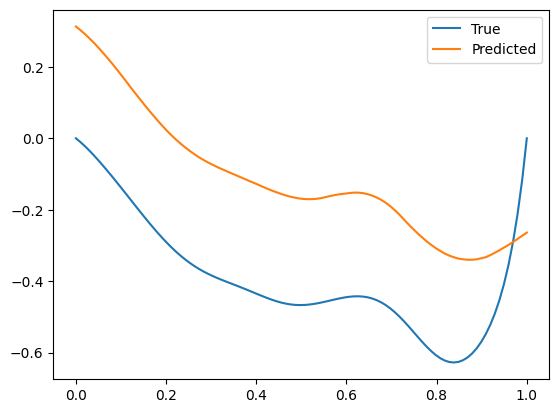

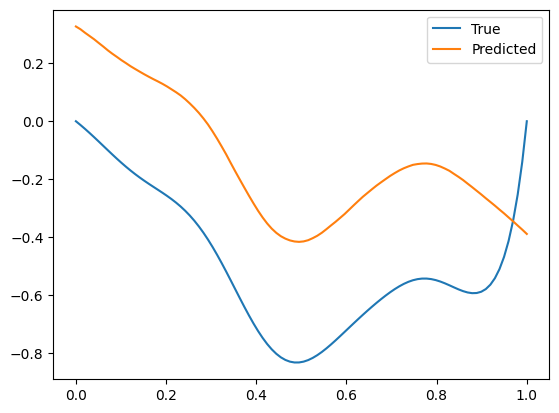

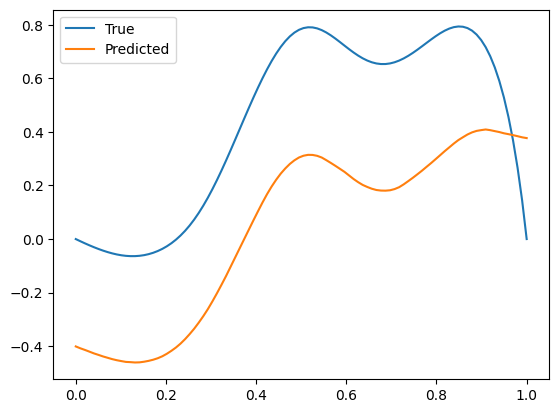

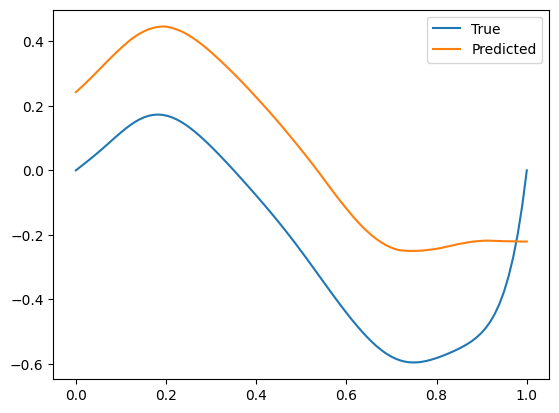

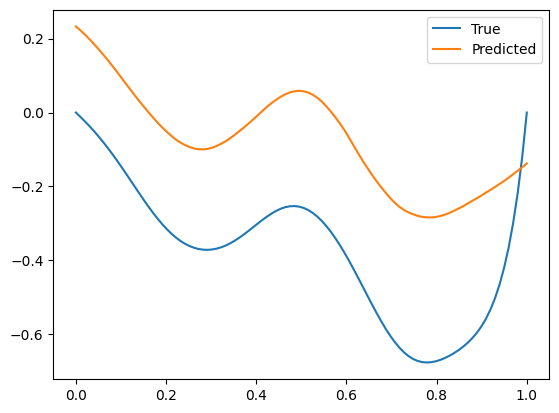

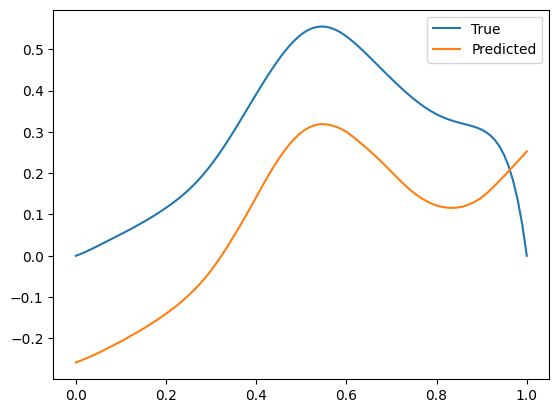

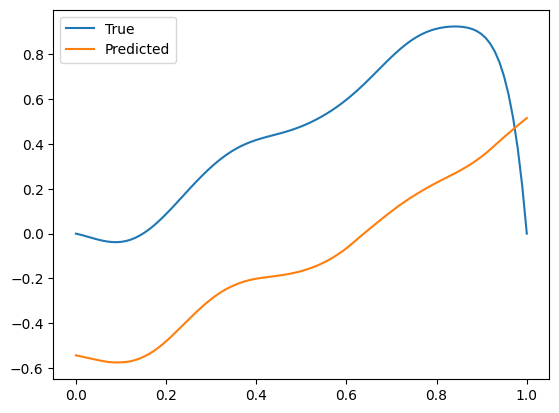

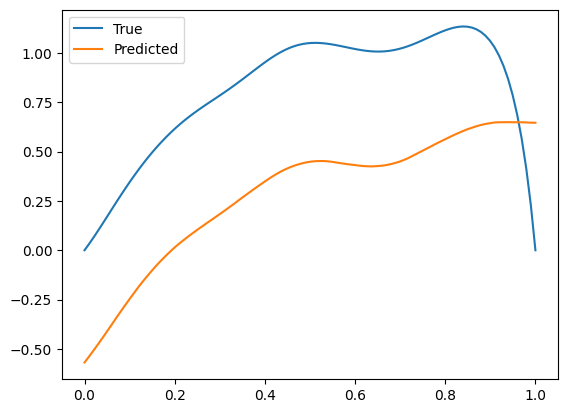

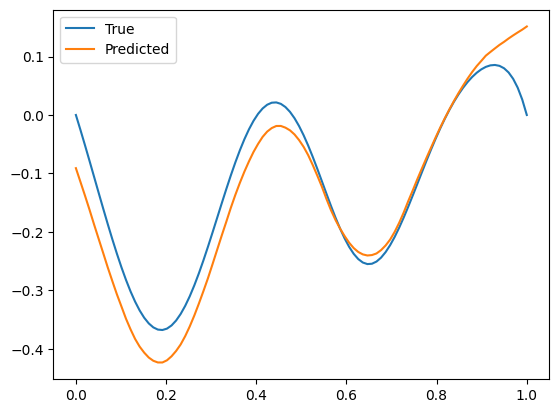

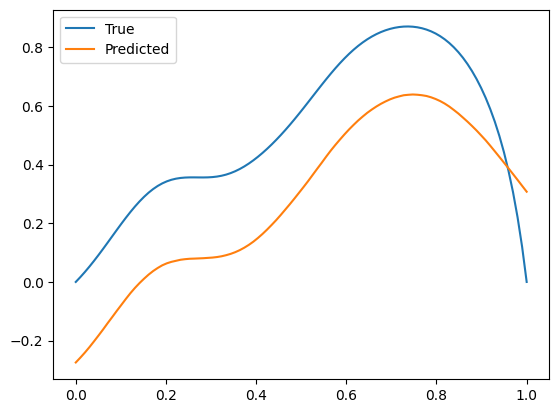

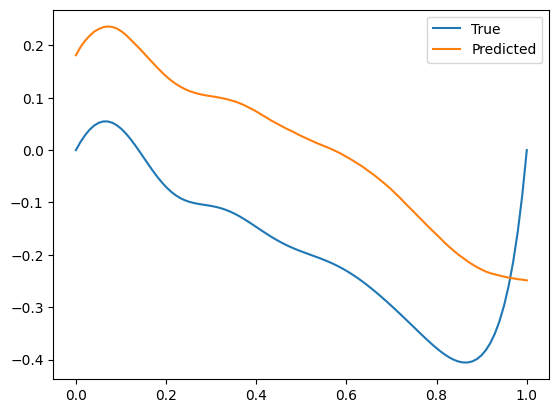

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:37:30,657 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:37:30,659 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.003812
2025-08-05 20:37:30,660 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.003978
Training progress:  10%|█         | 1/10 [00:05<00:48,  5.35s/it]

In [ ]:
for _ in range(10):
    train_history = model.fit()
    plt.figure(figsize=(10,6))
    plt.plot(train_history[0], label='Training Loss')  # we plot training loss
    plt.plot(train_history[1], label='Test Loss')  # we plot test loss
    plt.yscale('log')  # we use log scale for better visualization
    plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
    plt.xlabel('Epochs')  # we add x label
    plt.ylabel('Loss')  # we add y label
    plt.title('Training and Test Loss Over Time')  # we add title
    plt.legend()  # we add legend
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
        
        # then we can test the model
    mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

    preds = model.predict(mu_test, xs_test)
    for i in range(20):
        plt.plot(xs_test[i,:],sol_test[i,:], label='True')
        plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
        plt.legend()
        plt.show()

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


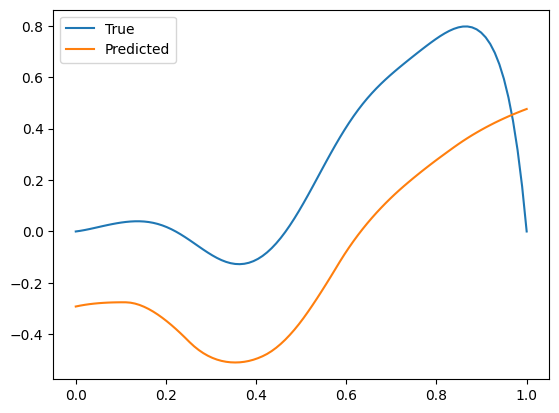

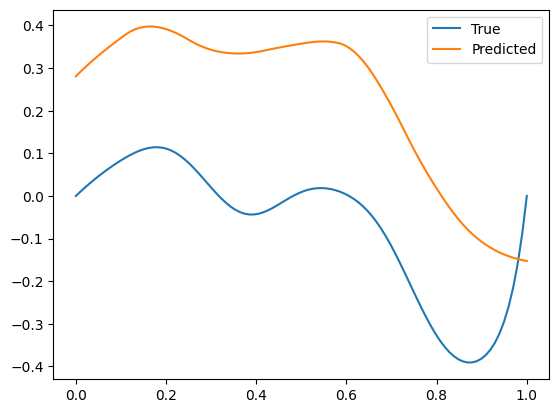

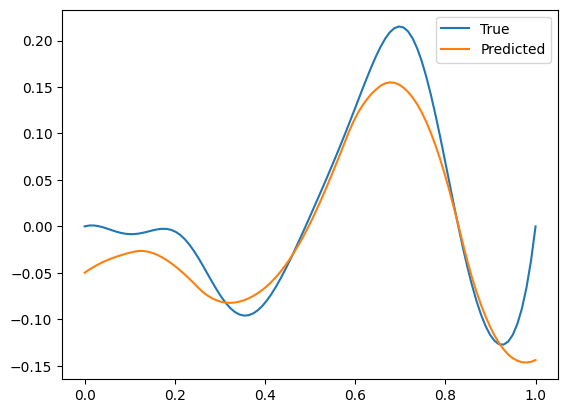

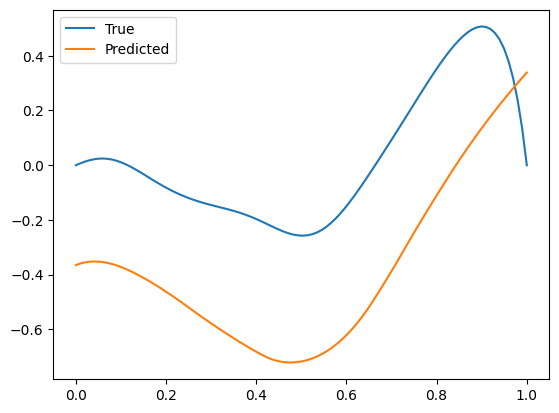

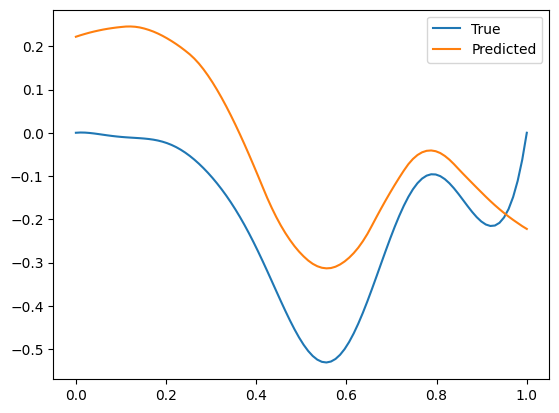

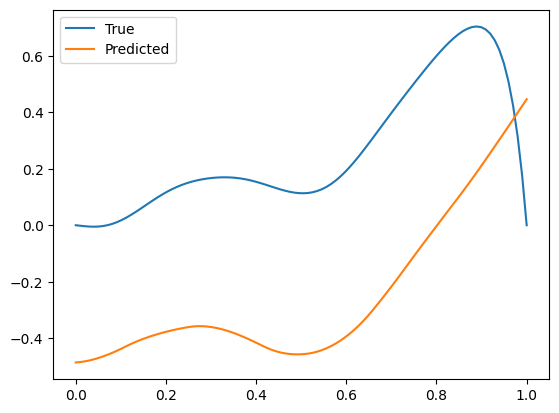

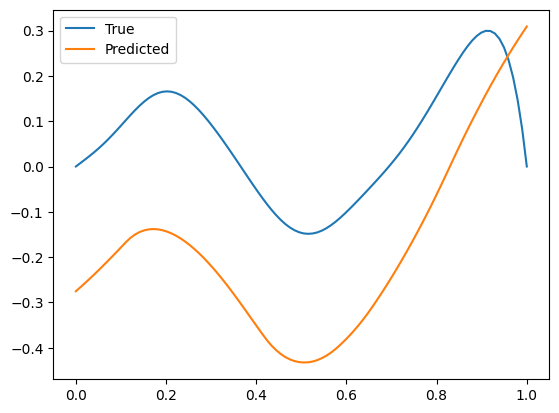

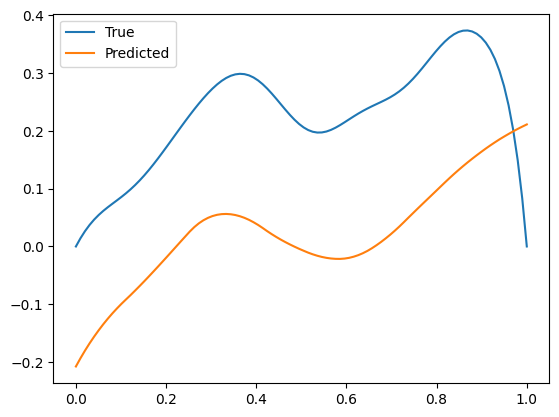

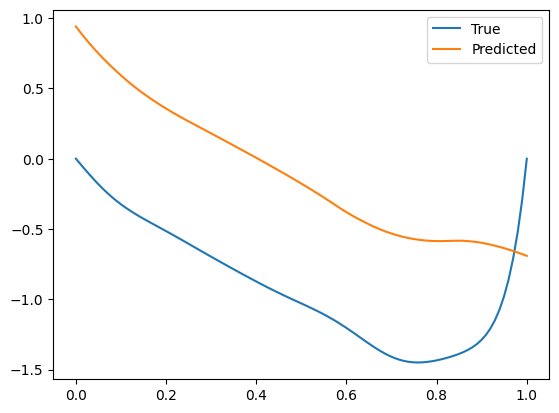

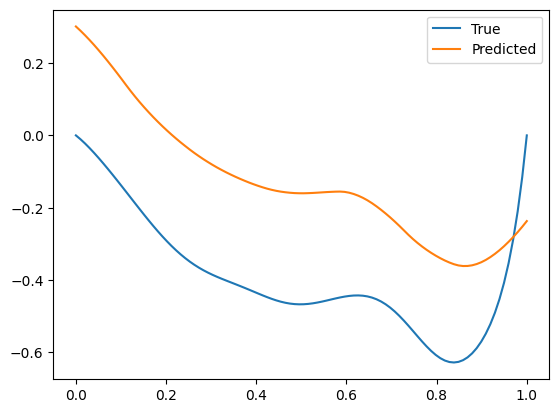

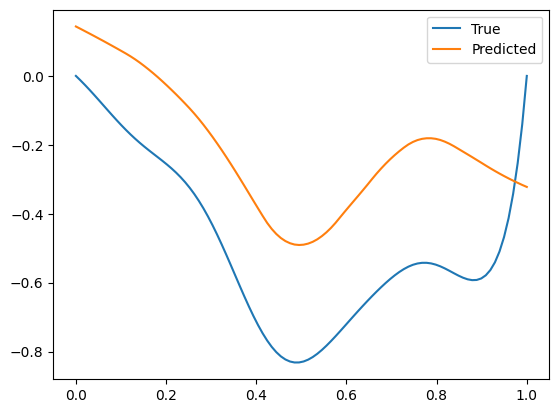

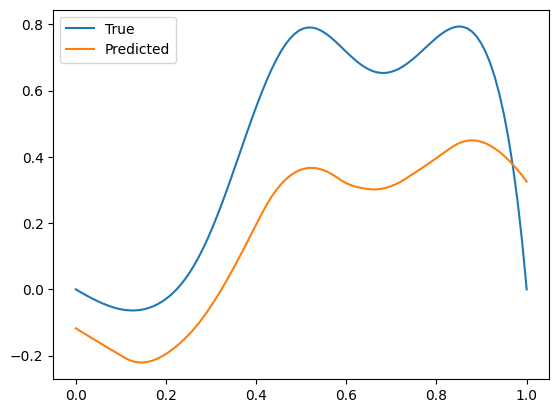

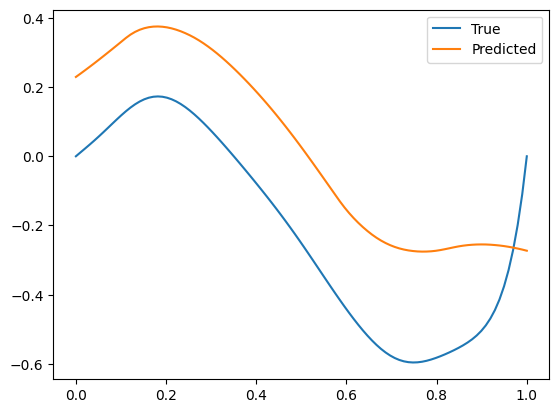

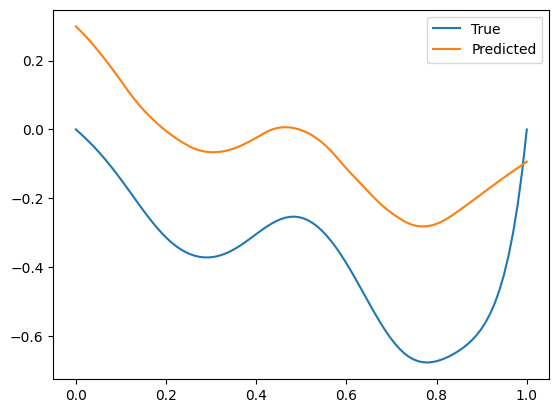

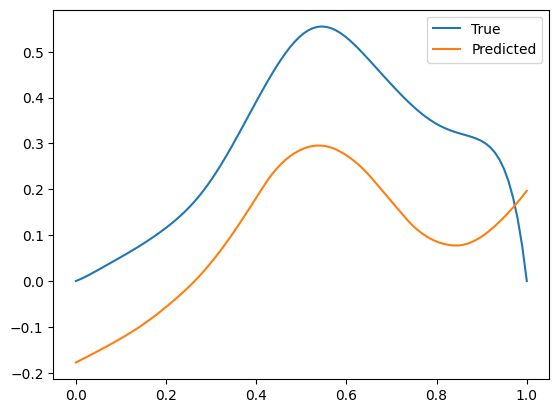

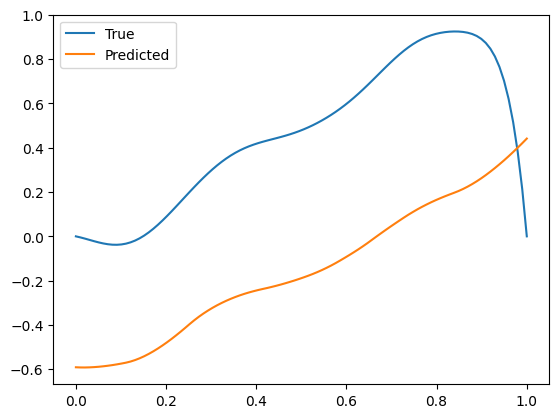

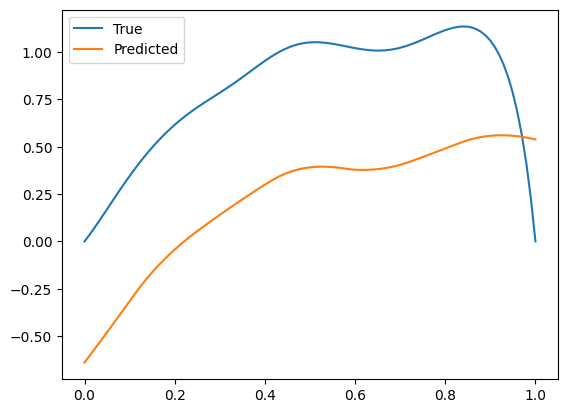

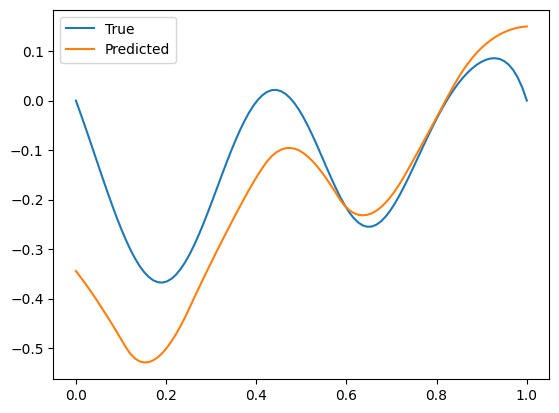

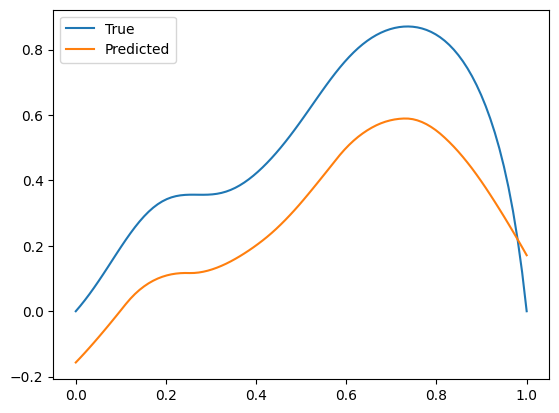

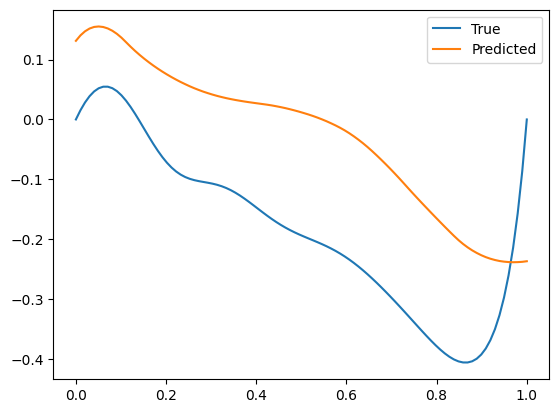

In [ ]:
# then we can test the model
mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

preds = model.predict(mu_test, xs_test)
for i in range(20):
    plt.plot(xs_test[i,:],sol_test[i,:], label='True')
    plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
    plt.legend()
    plt.show()